<h3>
   Geographic, Energy Type, and Temporal Effects on Green Jobs
</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import statsmodels.api as sm
from scipy import stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest, normaltest, kruskal, friedmanchisquare

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [4]:
# Set visual display settings
sns.set(style='whitegrid')

In [5]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [6]:
# Get the first few rows of the data
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


<h4>Normalize Dataset</h4>

In [7]:
# Remove categorical columns
cat_cols = ['Year', 'Country', 'Energy Type']
numeric_df = df.drop(cat_cols, axis=1)

# Normalize the numeric columns
scaler = StandardScaler()
df_normalized = scaler.fit_transform(numeric_df)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(df_normalized, columns=numeric_df.columns)

# Add back the categorical columns
normalized_df = pd.concat([df[cat_cols], normalized_df], axis=1)

In [8]:
normalized_df.tail()

,Year,Country,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
2495,2023,Japan,Solar,-0.305344,1.505278,0.218850,0.169260,0.171769,0.271733,0.249020,...,0.224417,0.015143,0.348158,1.328304,-0.880844,1.739829,1.302468,-0.702963,0.976281,-0.948523
2496,2017,Australia,Hydro,-1.386577,0.250602,0.223382,-1.439457,0.732061,0.843947,0.225221,...,0.637122,1.297479,-0.384199,1.355319,0.920247,0.522347,-0.185700,0.813703,0.976281,1.054271
2497,2022,India,Geothermal,1.608823,-0.146980,1.255716,1.516781,-0.782626,1.465306,1.224929,...,-0.628181,-1.646005,0.034887,0.355731,-0.049572,-0.501130,0.115877,-0.848301,-1.024295,1.054271
2498,2000,China,Biomass,0.616304,-1.476630,0.236555,0.260638,-1.376837,-0.049725,-0.180715,...,0.334289,-0.666159,-1.150714,0.078818,-0.153481,-1.641565,-1.640533,-1.443933,0.976281,-0.948523
2499,2010,France,Hydro,-1.260183,-0.137774,-0.766877,-0.707004,0.501039,0.609256,-0.871346,...,1.554845,-1.080348,-0.830684,-0.849854,-1.123299,-1.592977,-0.030649,1.444865,-1.024295,-0.948523


<h4>Statistical Analysis</h4>

In [9]:
# Remove categorical columns
cat_cols = ['Year', 'Country', 'Energy Type']
numeric_df = df.drop(cat_cols, axis=1)

<h5>Test for Normal Distribution</h5>

In [10]:
# Perform Kolmogorov-Smirnov test
statistic, p_value = kstest(numeric_df, 'norm')
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpret the result
if p_value.all() < 0.05:
    print('Reject the null hypothesis: data is not normally distributed.')
else:
    print('Fail to reject the null hypothesis: data is normally distributed.')

Statistic: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.5        1.
 0.5        0.75331609 1.         1.         0.84314381 0.96988911
 0.96529922 0.96535974 0.99757492 0.50007828 0.51995957 1.
 1.         0.7960819  0.5        0.9691279  0.97298403 0.5
 0.99796833 0.78618267 0.5        0.5        0.97027    0.975883
 0.97307203 0.5        0.79245893 0.79158108 0.79781711 0.78990731
 0.79174098 0.97352801 0.96665101 0.96808141 0.9934501  0.9690501
 0.9996     1.         0.9707876  0.5        0.5       ], p-value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Reject the null hypothesis: data is not normally distributed.


In [11]:
# Perform D'Agostino's K-squared test
statistic, p_value = normaltest(numeric_df)
print(f'Statistic: {statistic}, p-value: {p_value}')

# Interpret the result
if p_value.all() < 0.05:
    print('Reject the null hypothesis: data is not normally distributed.')
else:
    print('Fail to reject the null hypothesis: data is normally distributed.')

Statistic: [1793.56734144 2202.23220061 2028.95367597 2728.94529035 2592.98267878
 2853.63063148 2096.59580022 2185.06509459 2678.25702193 2045.24476985
 8872.3995029  1909.52158866 8867.97078962 2344.41727218 1876.34982582
 2941.9207164  2685.29692741 1940.26665691 2522.05099133 2075.00279186
 1887.26468459 1855.73269529 2328.93567181 2180.04086545 2224.66933814
 1527.08687651 8869.1930385  1683.08537329 2076.77293829 8881.87828276
 1810.13206671 1966.5938151  8870.66910056 8869.65683357 1677.05210906
 2756.4110025  1430.06890501 8881.87828276 2019.14934927 1935.39017646
 2021.67817767 2411.53400114 2247.98984032 1535.12928759 2075.28920186
 1783.38861026 3109.47426573 1977.33921631 1826.19533852 3035.15670922
 2338.2476225  8878.26234982 8927.60157543], p-value: [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+0

<h4>Non-Parametric Statistically Difference Test</h4>

In [12]:
# Perform Kruskal-Wallis test 
# Group data by 'Year'
grouped_data = [group['Renewable Energy Jobs'].values for name, group in normalized_df.groupby('Year')]

statistic, p_value = kruskal(*grouped_data)
print(f'Kruskal-Wallis H statistic: {statistic}, p-value: {p_value}')

if p_value.all() < 0.05:
    print("Reject the null hypothesis: There are significant differences in the median job counts across years.")
else:
    print("Fail to reject the null hypothesis: No significant differences in the median job counts across years.")

Kruskal-Wallis H statistic: 20.88153140528761, p-value: 0.5883221847549807
Fail to reject the null hypothesis: No significant differences in the median job counts across years.


In [13]:
group1 = df[df['Country'] == 'USA']['Renewable Energy Jobs']
group2 = df[df['Country'] == 'Australia']['Renewable Energy Jobs']
group3 = df[df['Country'] == 'Japan']['Renewable Energy Jobs']
group4 = df[df['Country'] == 'China']['Renewable Energy Jobs']
group5 = df[df['Country'] == 'India']['Renewable Energy Jobs']
group6 = df[df['Country'] == 'Germany']['Renewable Energy Jobs']
group7 = df[df['Country'] == 'France']['Renewable Energy Jobs']
group8 = df[df['Country'] == 'Brazil']['Renewable Energy Jobs']
group9 = df[df['Country'] == 'Russia']['Renewable Energy Jobs']
group10 = df[df['Country'] == 'Canada']['Renewable Energy Jobs']


# Perform the Kruskal-Wallis test
stat, p_value = kruskal(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

# Print results
print(f'Kruskal-Wallis H statistic: {stat}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value.any() < alpha:
    print("Reject the null hypothesis: There are significant differences in renewable energy jobs across countries")
else:
    print("Fail to reject the null hypothesis: No significant differences in renewable energy jobs across countries")

Kruskal-Wallis H statistic: 4.562263917230889, p-value: 0.870677739693545
Fail to reject the null hypothesis: No significant differences in renewable energy jobs across countries


In [14]:
# Group renewable energy usage by category factor (e.g., income level)
group1 = df[df['Energy Type'] == 'Solar']['Renewable Energy Jobs']
group2 = df[df['Energy Type'] == 'Wind']['Renewable Energy Jobs']
group3 = df[df['Energy Type'] == 'Hydro']['Renewable Energy Jobs']
group4 = df[df['Energy Type'] == 'Geothermal']['Renewable Energy Jobs']
group5 = df[df['Energy Type'] == 'Biomass']['Renewable Energy Jobs']


# Perform the Kruskal-Wallis test
stat, p_value = kruskal(group1, group2, group3, group4, group5)

# Print results
print(f'Kruskal-Wallis H statistic: {stat}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value.any() < alpha:
    print("Reject the null hypothesis: There are significant differences in renewable energy jobs between energy types.")
else:
    print("Fail to reject the null hypothesis: No significant differences in renewable energy jobs between energy types.")

Kruskal-Wallis H statistic: 6.128419326862509, p-value: 0.18976091067905912
Fail to reject the null hypothesis: No significant differences in renewable energy jobs between energy types.


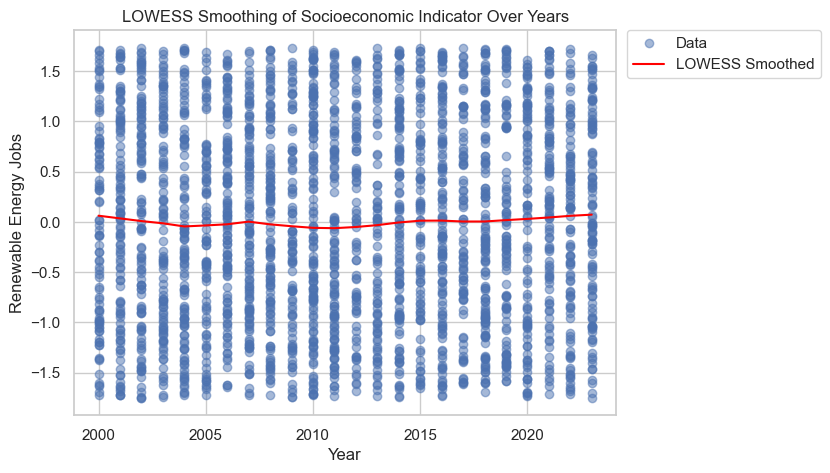

In [15]:
# Fit LOWESS to the data
lowess = sm.nonparametric.lowess(normalized_df['Renewable Energy Jobs'], normalized_df['Year'], frac=0.3)

# Plotting results
plt.figure(figsize=(7, 5))
plt.scatter(normalized_df['Year'], normalized_df['Renewable Energy Jobs'], alpha=0.5, label='Data')
plt.plot(lowess[:, 0], lowess[:, 1], color='red', label='LOWESS Smoothed')
plt.title('LOWESS Smoothing of Socioeconomic Indicator Over Years')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Jobs')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

<h4>Non-Parametric Regression</h4>

In [16]:
# Prepare the data
X = normalized_df[['Country', 'Energy Type', 'Year']]
y = normalized_df['Renewable Energy Jobs']

# Encode categorical variables
encoder = LabelEncoder()
X['Country'] = encoder.fit_transform(X['Country'])
X['Energy Type'] = encoder.fit_transform(X['Energy Type'])

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Make predictions
dt_pred = dt_model.predict(X)
rf_pred = rf_model.predict(X)

# Evaluate the models
dt_mse = mean_squared_error(y, dt_pred)
rf_mse = mean_squared_error(y, rf_pred)

print(f'Decision Tree MSE: {dt_mse:.2f}')
print(f'Random Forest MSE: {rf_mse:.2f}')

/var/folders/t8/kz2v06bs11bf32v6h9jcln_m0000gn/T/ipykernel_1608/2687571320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Country'] = encoder.fit_transform(X['Country'])
/var/folders/t8/kz2v06bs11bf32v6h9jcln_m0000gn/T/ipykernel_1608/2687571320.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Energy Type'] = encoder.fit_transform(X['Energy Type'])


Decision Tree MSE: 0.60
Random Forest MSE: 0.62


<h4>Feature Importance</h4>

In [17]:
# Initialize LabelEncoder
le_country = LabelEncoder()
le_energy = LabelEncoder()

# Encode categorical variables
normalized_df['Country'] = le_country.fit_transform(normalized_df['Country'])
normalized_df['Energy Type'] = le_energy.fit_transform(normalized_df['Energy Type'])

# Check the encoding
print(normalized_df[['Country', 'Energy Type']].head())

   Country  Energy Type
0        9            3
1        0            1
2        2            0
3        7            0
4        3            3


In [18]:
# Define features and target variable
X = normalized_df[['Country', 'Energy Type', 'Year']]
y = normalized_df['Renewable Energy Jobs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and fit the model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# Initialize and fit the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
# Get feature importance
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

       Feature  Importance
2         Year    0.445606
0      Country    0.346261
1  Energy Type    0.208133


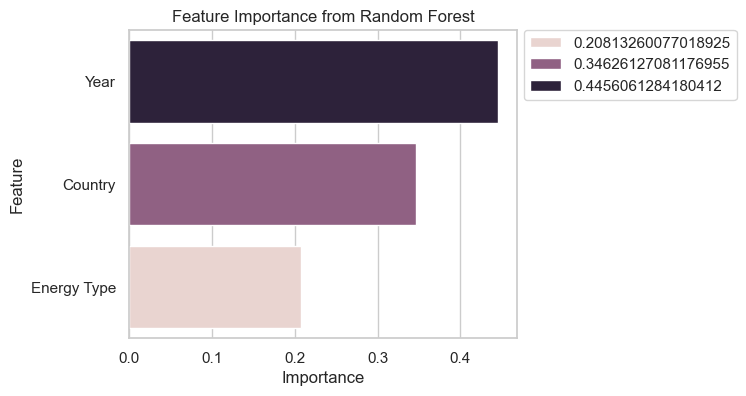

In [21]:
# Plotting feature importance
plt.figure(figsize=(5, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Importance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Feature Importance from Random Forest')
plt.show()